In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
df = pd.read_csv("emissions.csv")
df2 = df[["project_name", "cpu_energy", "ram_energy"]]

In [3]:
df2 = df2.set_index("project_name")

Text(0.5, 0, '')

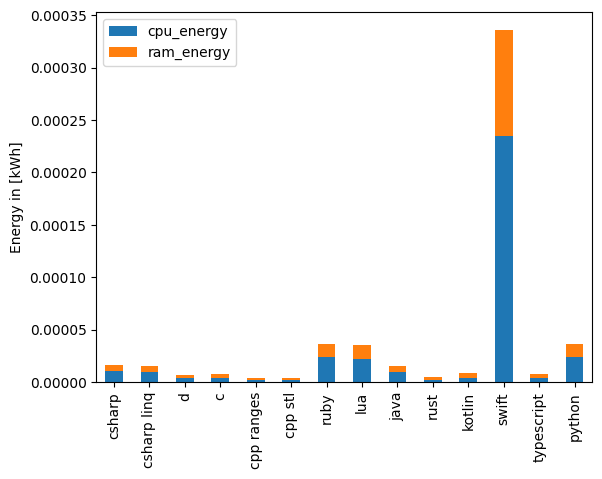

In [4]:
ax = df2.plot.bar(stacked=True)
plt.ylabel("Energy in [kWh]")
plt.xlabel("")
#ax.bar_label(ax.containers[0])

In [5]:
df2

,cpu_energy,ram_energy
project_name,,
csharp,0.000010,0.000006
csharp linq,0.000010,0.000006
d,0.000003,0.000004
c,0.000003,0.000004
cpp ranges,0.000002,0.000002
cpp stl,0.000002,0.000002
ruby,0.000024,0.000012
lua,0.000022,0.000013
java,0.000010,0.000006


In [6]:
df2["total_energy"] = df2.cpu_energy + df2.ram_energy

In [7]:
df2

,cpu_energy,ram_energy,total_energy
project_name,,,
csharp,0.000010,0.000006,0.000016
csharp linq,0.000010,0.000006,0.000016
d,0.000003,0.000004,0.000007
c,0.000003,0.000004,0.000007
cpp ranges,0.000002,0.000002,0.000004
cpp stl,0.000002,0.000002,0.000004
ruby,0.000024,0.000012,0.000037
lua,0.000022,0.000013,0.000035
java,0.000010,0.000006,0.000015


In [8]:
df2.sort_values("total_energy", ascending=False)

,cpu_energy,ram_energy,total_energy
project_name,,,
swift,0.000235,0.000101,0.000336
python,0.000023,0.000013,0.000037
ruby,0.000024,0.000012,0.000037
lua,0.000022,0.000013,0.000035
csharp,0.000010,0.000006,0.000016
csharp linq,0.000010,0.000006,0.000016
java,0.000010,0.000006,0.000015
kotlin,0.000004,0.000004,0.000008
typescript,0.000004,0.000004,0.000008


In [9]:
min_val = df2.total_energy.min()
df2["normed_total_energy"] = df2.total_energy / min_val

In [10]:
df2

,cpu_energy,ram_energy,total_energy,normed_total_energy
project_name,,,,
csharp,0.000010,0.000006,0.000016,3.907948
csharp linq,0.000010,0.000006,0.000016,3.759290
d,0.000003,0.000004,0.000007,1.661764
c,0.000003,0.000004,0.000007,1.721028
cpp ranges,0.000002,0.000002,0.000004,1.003900
cpp stl,0.000002,0.000002,0.000004,1.000000
ruby,0.000024,0.000012,0.000037,8.825387
lua,0.000022,0.000013,0.000035,8.429155
java,0.000010,0.000006,0.000015,3.738583


In [11]:
df3 = df2[["normed_total_energy"]]

In [12]:
df3

,normed_total_energy
project_name,
csharp,3.907948
csharp linq,3.759290
d,1.661764
c,1.721028
cpp ranges,1.003900
cpp stl,1.000000
ruby,8.825387
lua,8.429155
java,3.738583


Text(0.5, 0, '')

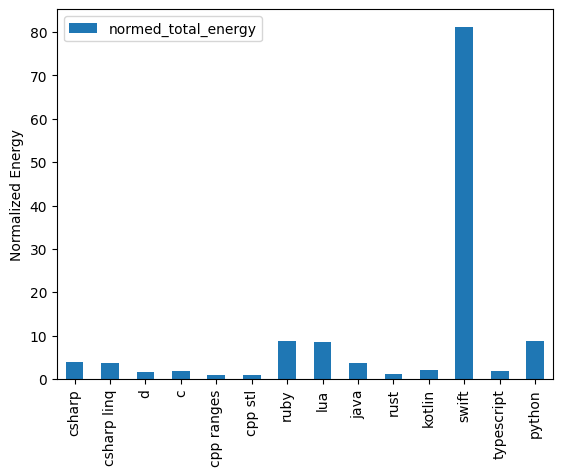

In [13]:
df3.plot.bar(stacked=True)
plt.ylabel("Normalized Energy")
plt.xlabel("")

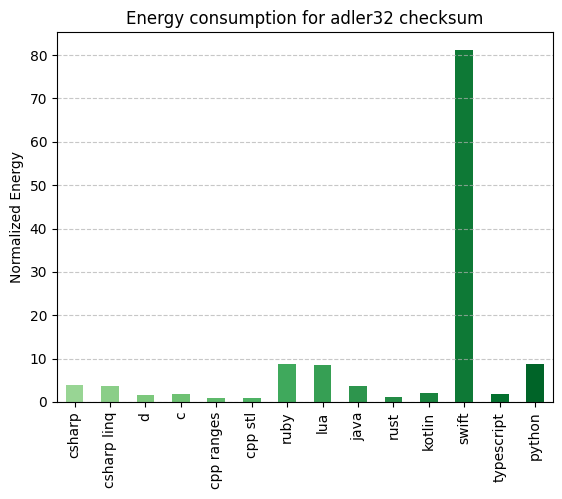

In [16]:
# Generate shades of green for each bar
colors = cm.Greens(np.linspace(0.4, 0.9, len(df3)))

ax = df3["normed_total_energy"].plot(kind="bar", color=colors)
plt.ylabel("Normalized Energy")
plt.xlabel("")
plt.title("Energy consumption for adler32 checksum")  # Add title
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Add grid on y-axis
plt.show()